In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm

# Load the data we are going to work

In [2]:
#Use pd.read_csv to read the csv file
df = pd.read_csv('walmart_sales.csv')

In [3]:
#Drop the first column since it is not necessary in our analysis
df.drop(columns = df.columns[0], inplace = True)

In [4]:
#See the first 5 rows to see if the dataset looks like what we expected
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Close,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,53.450001,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,53.450001,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,53.450001,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,53.450001,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,53.450001,A,151315


In [5]:
df.shape

(409727, 12)

# Data Visualization

In [6]:
#Plot an histogram of the variables we are interested on

In [7]:
'''I am interested on the weekly sales as my dependant variable since it is what we are trying to predict'''

'I am interested on the weekly sales as my dependant variable since it is what we are trying to predict'

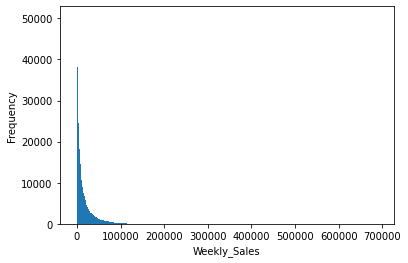

In [8]:
#Plot a histogram of the weekly_sales variables
n_bins = np.sqrt(len(df['Weekly_Sales']))
n_bins = int(n_bins)
plt.hist(df['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

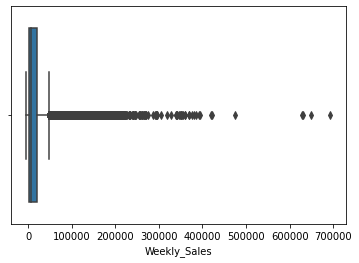

In [9]:
#Plot a boxplot
sns.boxplot(x = 'Weekly_Sales', data = df)

In [10]:
'''From the box plot, we are able to see that there may be some outliers'''

'From the box plot, we are able to see that there may be some outliers'

### Removing outliers 

In [11]:
#Process to remove outliers
mean = df['Weekly_Sales'].mean()
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)

In [12]:
IQR = Q3 - Q1

In [13]:
df = df.loc[df['Weekly_Sales'] >= Q1 - 1.5*IQR]
df = df.loc[df['Weekly_Sales'] <= Q3 + 1.5*IQR]

In [14]:
df.shape

(375188, 12)

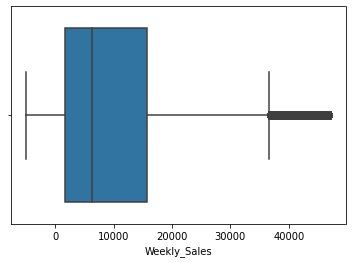

In [15]:
sns.boxplot(x = 'Weekly_Sales', data = df)

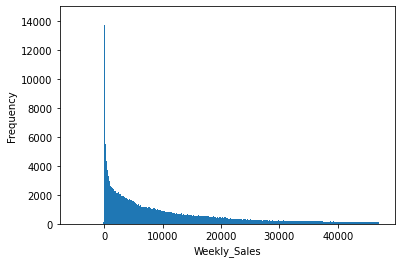

In [16]:
#Plot a histogram of the weekly_sales variables
n_bins = np.sqrt(len(df['Weekly_Sales']))
n_bins = int(n_bins)
plt.hist(df['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

In [17]:
'''It does not look like the weekly sales follow a normal distribution based on the histogram'''

'It does not look like the weekly sales follow a normal distribution based on the histogram'

In [18]:
df_2 = df.drop(columns = {'Date','Store', 'Dept', 'IsHoliday', 'Type', 'Size'})

In [19]:
#Plot a correlation heat map to see the correlation among all the variables
df_corr = df_2.corr()

In [20]:
df_corr

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Close
Weekly_Sales,1.000000,0.001416,0.007062,-0.037607,-0.009346,-0.003274
Temperature,0.001416,1.000000,0.143087,0.177008,0.101062,0.098519
Fuel_Price,0.007062,0.143087,1.000000,-0.168826,-0.029669,0.469201
CPI,-0.037607,0.177008,-0.168826,1.000000,-0.312462,0.063113
Unemployment,-0.009346,0.101062,-0.029669,-0.312462,1.000000,-0.216900
Close,-0.003274,0.098519,0.469201,0.063113,-0.216900,1.000000


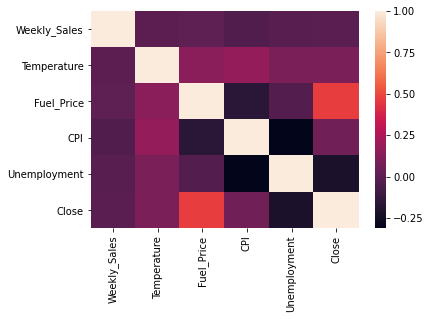

In [21]:
sns.heatmap(df_corr)

'''Looks like the variables that are more correlated are the Fuel_Price and the Close price of the stock. On the other hand, there is no a clear correlation between the sales and any of the variables'''


### Relation among the departments and the weekly sales

In [22]:
#We are going to group by department and take the sum of all the weekly sales
df_dept_group = df.groupby('Dept').agg({'Weekly_Sales':'sum'})

In [23]:
#Ascending themm from the highest to the lowest and save as a data frame
df_dept_sorted = pd.DataFrame(df_dept_group['Weekly_Sales'].sort_values(ascending = False))

In [24]:
#See the 10 most important departments in terms of sales
df_dept_sorted.head(10)

,Weekly_Sales
Dept,
8,1.326477e+08
13,1.316892e+08
4,1.314791e+08
79,1.193931e+08
46,1.140393e+08
23,1.106379e+08
10,1.047456e+08
40,1.014016e+08
7,1.008975e+08


By taking into consideration the sales, the departments that look more important are the following: Departments 8, 13, 4, 79, 46, 23, 10, 40, 7, and 1.

#### Plot visualizations between the department and the weekly sales

In [25]:
#Each loc has the department we are interested to know how they are distributed
df_dept8 = df.loc[df['Dept'] == 8]
df_dept13 = df.loc[df['Dept'] == 13]
df_dept4 = df.loc[df['Dept'] == 4]
df_dept79 = df.loc[df['Dept'] == 79]
df_dept46 = df.loc[df['Dept'] == 46]
df_dept23 = df.loc[df['Dept'] == 23]
df_dept10 = df.loc[df['Dept'] == 10]
df_dept40 = df.loc[df['Dept'] == 40]
df_dept7 = df.loc[df['Dept'] == 7]
df_dept1 = df.loc[df['Dept'] == 1]

In [26]:
#Have a complete data frame to see possible correlations
df_dept = pd.concat([df_dept8, df_dept13, df_dept4, df_dept79, df_dept46, df_dept23, df_dept10, df_dept40, df_dept7,
                    df_dept1], axis = 0)

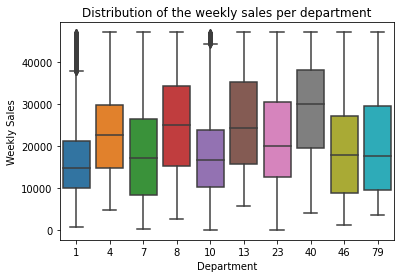

In [27]:
#Make a boxplot of the distribution per each department
sns.boxplot(x="Dept", y="Weekly_Sales", data=df_dept)
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.title('Distribution of the weekly sales per department')
plt.show()

Based on the boxplots we just made for the 10 most important departments regarding weekly sales, we can see they do not follow a normal distribution just like in overall the boxplot's graphic of the weekly sales with all de department included. This is an important thing to take into consideration.

#### Correlation among the most important departments and weekly sales

In [28]:
#Extract the columns I am intereted. In this case, department and weekly sales
df_dept2 = df_dept[['Dept', 'Weekly_Sales']]

In [29]:
#Convert the department into dummies variables, and concat it to the department data frame to see correlations
df_dept_dummies = pd.get_dummies(df_dept2['Dept'])
df_dept2 = df_dept2.drop(columns = 'Dept')
df_dept2 = pd.concat([df_dept2, df_dept_dummies], axis = 1)

In [30]:
#Create a correlation matrix
corr_matrix = df_dept2.corr()
corr_matrix

,Weekly_Sales,1,4,7,8,10,13,23,40,46,79
Weekly_Sales,1.000000,-0.127341,0.064364,-0.092551,0.102847,-0.108940,0.119040,0.004780,0.175213,-0.064804,-0.022000
1,-0.127341,1.000000,-0.119479,-0.119761,-0.116092,-0.124032,-0.113942,-0.114352,-0.092017,-0.124205,-0.122313
4,0.064364,-0.119479,1.000000,-0.115719,-0.112174,-0.119846,-0.110096,-0.110493,-0.088911,-0.120012,-0.118185
7,-0.092551,-0.119761,-0.115719,1.000000,-0.112438,-0.120128,-0.110356,-0.110753,-0.089121,-0.120295,-0.118463
8,0.102847,-0.116092,-0.112174,-0.112438,1.000000,-0.116449,-0.106975,-0.107361,-0.086391,-0.116610,-0.114835
10,-0.108940,-0.124032,-0.119846,-0.120128,-0.116449,1.000000,-0.114292,-0.114703,-0.092299,-0.124586,-0.122688
13,0.119040,-0.113942,-0.110096,-0.110356,-0.106975,-0.114292,1.000000,-0.105372,-0.084791,-0.114450,-0.112707
23,0.004780,-0.114352,-0.110493,-0.110753,-0.107361,-0.114703,-0.105372,1.000000,-0.085096,-0.114863,-0.113113
40,0.175213,-0.092017,-0.088911,-0.089121,-0.086391,-0.092299,-0.084791,-0.085096,1.000000,-0.092428,-0.091020
46,-0.064804,-0.124205,-0.120012,-0.120295,-0.116610,-0.124586,-0.114450,-0.114863,-0.092428,1.000000,-0.122859


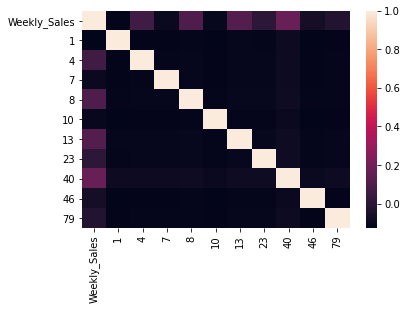

In [31]:
#Plot a heatmap
sns.heatmap(corr_matrix)

By loooking the heatmap and the correlation matrix, we can conclude there is not a significance correlation between weekly sales and the 10 departments with highest weekly sales.The department that looks to have more correlation is the department 13, but is not significant.

## Relation among the stores and the weekly sales

In [32]:
#Group by store and sum the weekly sales per each store
df_store_group = df.groupby('Store').agg({'Weekly_Sales':'sum'})

In [33]:
#Sort them from the highest to the lowest and see the 10 most important stores 
df_store_sorted = pd.DataFrame(df_store_group['Weekly_Sales'].sort_values(ascending = False))

In [34]:
#See the results
df_store_sorted.head(10)

,Weekly_Sales
Store,
23,1.288370e+08
6,1.260801e+08
11,1.212156e+08
27,1.204617e+08
2,1.178480e+08
13,1.155599e+08
20,1.150738e+08
28,1.145824e+08
19,1.125306e+08


#### Plot of the visualizations of the stores and the weekly sales

In [35]:
#Each loc has the information of each of the most important stores to plot
df_store23 = df.loc[df['Store'] == 23]
df_store6 = df.loc[df['Store'] == 6]
df_store11 = df.loc[df['Store'] == 11]
df_store27 = df.loc[df['Store'] == 27]
df_store2 = df.loc[df['Store'] == 2]
df_store13 = df.loc[df['Store'] == 13]
df_store20 = df.loc[df['Store'] == 20]
df_store28 = df.loc[df['Store'] == 28]
df_store19 = df.loc[df['Store'] == 19]
df_store1 = df.loc[df['Store'] == 1]

In [36]:
#Have a complete data frame to see possible correlations
df_store = pd.concat([df_store23, df_store6, df_store11, df_store27, df_store2, df_store13, df_store20, df_store28, 
                     df_store19, df_store1], axis = 0)

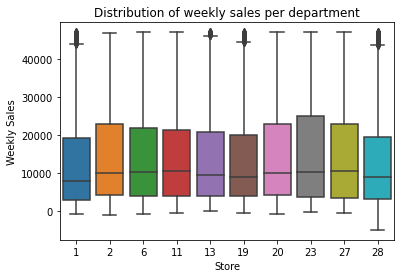

In [37]:
#Make a boxplot of the distribution of each store
sns.boxplot(x = 'Store', y = 'Weekly_Sales', data = df_store)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Distribution of weekly sales per department')
plt.show()

As we can see on the store distribution sales, all of them follows the same distribution than the weekly sales distribution. 

#### Correlation among the store and the weekly sales

In [38]:
#Extract the columns I am intereted. In this case, department and weekly sales
df_store2 = df_store[['Store', 'Weekly_Sales']]

In [39]:
#Convert the department into dummies variables, and concat it to the department data frame to see correlations
df_store_dummies = pd.get_dummies(df_store2['Store'])
df_store2 = df_store2.drop(columns = 'Store')
df_store2 = pd.concat([df_store2, df_store_dummies], axis = 1)

In [40]:
#Calculate the correlation matrix
corr_matrix = df_store2.corr()

In [41]:
#See the values
corr_matrix

,Weekly_Sales,1,2,6,11,13,19,20,23,27,28
Weekly_Sales,1.000000,-0.029251,0.011596,0.019971,-0.002279,0.001570,-0.024941,0.017594,0.020461,0.012834,-0.026177
1,-0.029251,1.000000,-0.109937,-0.112834,-0.114009,-0.110388,-0.113263,-0.107496,-0.114161,-0.111101,-0.114579
2,0.011596,-0.109937,1.000000,-0.109683,-0.110825,-0.107305,-0.110100,-0.104495,-0.110973,-0.107999,-0.111380
6,0.019971,-0.112834,-0.109683,1.000000,-0.113745,-0.110132,-0.113000,-0.107247,-0.113896,-0.110844,-0.114314
11,-0.002279,-0.114009,-0.110825,-0.113745,1.000000,-0.111279,-0.114177,-0.108364,-0.115082,-0.111999,-0.115504
13,0.001570,-0.110388,-0.107305,-0.110132,-0.111279,1.000000,-0.110551,-0.104923,-0.111427,-0.108441,-0.111836
19,-0.024941,-0.113263,-0.110100,-0.113000,-0.114177,-0.110551,1.000000,-0.107655,-0.114329,-0.111265,-0.114748
20,0.017594,-0.107496,-0.104495,-0.107247,-0.108364,-0.104923,-0.107655,1.000000,-0.108509,-0.105601,-0.108907
23,0.020461,-0.114161,-0.110973,-0.113896,-0.115082,-0.111427,-0.114329,-0.108509,1.000000,-0.112148,-0.115658
27,0.012834,-0.111101,-0.107999,-0.110844,-0.111999,-0.108441,-0.111265,-0.105601,-0.112148,1.000000,-0.112559


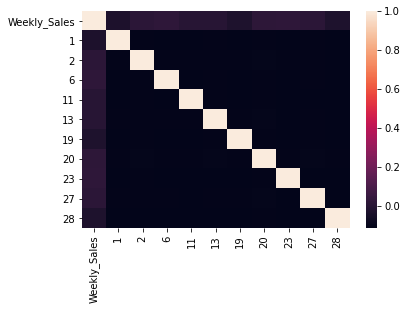

In [42]:
#Plot a heatmap
sns.heatmap(corr_matrix)

Same than correlation, we are not able to identify a clear correlation between weekly sales and number of stores. All the values say to us stores and weekly sales is uncorrelated. 

# Hypothesis testing for departments

Hypothesis: Department 8 would tend to higher mean on sales than the other nine departments.

In [43]:
#Define the array for department 8
dept8_array = df_dept8.groupby('Date').agg('mean')
dept8_array = dept8_array['Weekly_Sales'].values

In [44]:
#Define the array for the other 9 departments
dept2_array = df_dept.loc[df_dept['Dept'] != 8]
dept2_array = dept2_array.groupby('Date').agg('mean')
dept2_array = dept2_array['Weekly_Sales'].values

In [45]:
#Create a function to calculate the absolute difference between means
def diff_mean(array1, array2):
    return abs(np.mean(array1) - np.mean(array2))

In [46]:
# Calculate the absolute mean difference between department 8 and department 13
diff_mean(dept8_array, dept2_array)

4072.3594391476254

In [47]:
#Define a function to do the bootstraping for sample 1
def sampler(data, n):
    return np.random.choice(data)   

In [48]:
#Define a function to do the bootstraping for sample 2
def sampler_2(data2, n2):
    return np.random.choice(data2, n2)

In [49]:
#Repite the experiment over and over again by calculating the difference between the means
number_tries = 2000
diff = np.empty(number_tries)
for i in range(number_tries):
        diff[i] = np.mean(sampler(dept8_array, len(dept8_array))) - np.mean(sampler_2(dept2_array, len(dept2_array)))

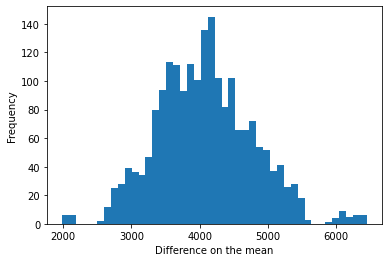

In [50]:
#Plot of the histogram to see the distribution of the means
n_bins = np.sqrt(len(diff))
n_bins = int(n_bins)
plt.hist(diff, bins = n_bins)
plt.xlabel('Difference on the mean')
plt.ylabel('Frequency')
plt.show()

#### Confidence Intervals of the data

In [51]:
#Calculate the mean, standard deviation and upper with lower border with ppf()
mean = diff.mean()
std = diff.std()
upper_border = norm.ppf(0.975, loc = mean, scale = std)
lower_border = norm.ppf(0.025, loc = mean, scale = std)

In [52]:
print('The 95% confidence interval where the difference of mean would be is', lower_border, 'and', upper_border)

The 95% confidence interval where the difference of mean would be is 2705.4686697937377 and 5458.2137403596


In [53]:
#Calculation of the p-value for a difference of mean higher than 0
p_value = np.sum(abs(diff) < abs(diff_mean(dept8_array, dept2_array)))/number_tries      

In [54]:
#Either approve or not our null hypothesis
p_value2 = np.sum(diff > 0)/number_tries

In [55]:
print('The p-value we got was:', p_value)

The p-value we got was: 0.5035


In [56]:
print('The probability to have the difference of means higher than 0 between department 8 and department 2 is:', p_value2)

The probability to have the difference of means higher than 0 between department 8 and department 2 is: 1.0


By doing a big number of repetition of test, we were able to conclude some things:
1. Department 8 would normally have higher mean of sales than the mean of the other nine departments. By repeting the experiments several times, we always got department 8 has higher mean of weekly sales than department 13. 
2. The difference between the means would not necessarily be approximately 4072.35 since we got a p-value of 50.25% which indicates not statistical significance. It could be higher or lower, but with mean of department 8 higher than mean of the other ninve departments

## Permutation Test

In [57]:
#Define the function of permutation test
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data1):]
    return perm_sample1, perm_sample2

In [58]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [59]:
#Start the for loop to repeat the test
number_tries = 5000
for i in range(number_tries):
    perm_sample1, perm_sample2 = permutation_sample(dept8_array, dept2_array)
    x_1, y_1 = ecdf(perm_sample1)
    x_2, y_2 = ecdf(perm_sample2)

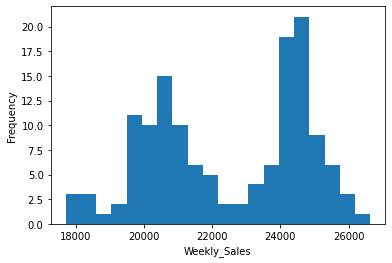

In [60]:
#Plot histogram 1
plt.hist(x_1, bins = 20)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

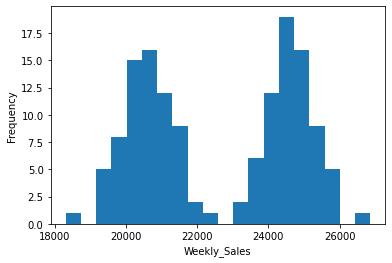

In [61]:
#Plot histogram 2
plt.hist(x_2, bins = 20)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

In [62]:
#Compute p-value
p_value = np.sum(x_1 < x_2)/len(x_1)

In [63]:
print('By running a permutation test, we got that the p-value of our null hypothesis is:', p_value)

By running a permutation test, we got that the p-value of our null hypothesis is: 0.7697841726618705


By running a completely random test, the mean of department 8 would not necessarily be higher than the mean of the other nine departments

# Hypothesis Testing for stores

Hypothesis : Store 23 would have in overall higher mean than the mean of the other 9 stores

In [64]:
#Define the array for store 23
store23_array = df_store23.groupby('Date').agg('mean')
store23_array = store23_array['Weekly_Sales'].values

In [65]:
#Define the array for the other 9 stores
store2_array = df_store.loc[df_store['Store'] != 23]
store2_array = store2_array.groupby('Date').agg('mean')
store2_array = store2_array['Weekly_Sales'].values

In [66]:
#Repite the experiment over and over again by calculating the difference between the means
number_tries = 5000
diff = np.empty(number_tries)
for i in range(number_tries):
        diff[i] = np.mean(sampler(store23_array, len(store23_array))) - np.mean(sampler_2(store2_array, len(store2_array)))

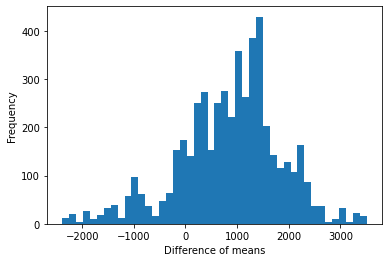

In [67]:
#Plot the histogram
plt.hist(diff, bins = n_bins)
plt.xlabel('Difference of means')
plt.ylabel('Frequency')
plt.show()

#### Confidence Intervals

In [68]:
#Calculation of the mean, standard deviation, and upper and lower border
mean = diff.mean()
std = diff.std()
upper_border = norm.ppf(0.975, loc = mean, scale = std)
lower_border = norm.ppf(0.025, loc = mean, scale = std)

In [69]:
print('The 95% confidence interval where the difference of mean would be is', lower_border, 'and', upper_border)

The 95% confidence interval where the difference of mean would be is -1084.1082895974582 and 2793.600032550543


In [70]:
#We would calculate the probability that the mean of store 23 is higher than store 20
p_value = np.sum(diff > 0)/number_tries

In [71]:
print('The options to get store 23 with higher mean sales than the other 9 stores is:', p_value)

The options to get store 23 with higher mean sales than the other 9 stores is: 0.8274


We did not get any signficant statistical results that store 23 would have mean sales than the other 9 stores

#### Permutation Test

In [72]:
#Make the experiment over and over again
number_tries = 5000
for i in range(number_tries):
    perm_sample1, perm_sample2 = permutation_sample(store23_array, store2_array)
    x_1, y_1 = ecdf(perm_sample1)
    x_2, y_2 = ecdf(perm_sample2)

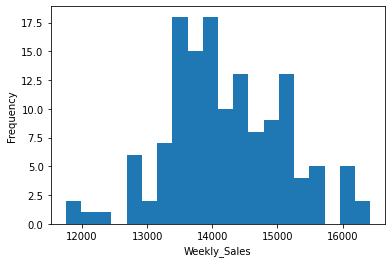

In [73]:
#Plot histogram 1
plt.hist(x_1, bins = 20)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

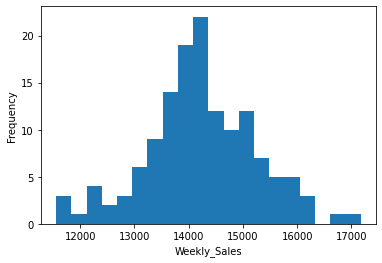

In [74]:
#Plot histogram 2
plt.hist(x_2, bins = 20)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

In [75]:
#Compute p-value
p_value = np.sum(x_1 < x_2)/len(x_1)

In [76]:
print('The p-value we got was:', p_value)

The p-value we got was: 0.7482014388489209


From this p-value, we got to the conclusion that would not necessarily be true that the mean of store 23 would be higher than the mean of the other nine stores. Permutation test is a completely randomized test

### Final Conclusion

1. Permutation test may not be the best option since weekly sales department may not be interchangable.
2. Therefore, I would incline to use the conclusions with the boostrapping method since they look stronger than the conclusions made from the permutation test and it does not interchange weekly sales between departments